In [10]:
import pandas as pd
import numpy as ny
import os
import chardet
import matplotlib.pyplot as plt

In [1]:
!pip install -U -q PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [14]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
fileDownloaded = drive.CreateFile({'id':'1WPo4J9wi0bIXl2I5da_UYc1UqV8q_iRw'})

In [8]:
fileDownloaded.GetContentFile('data_init.csv')

In [11]:
with open('data_init.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.4445340489203496,
 'language': 'Turkish'}

In [12]:
data_init = pd.read_csv('data_init.csv',encoding='iso-8859-1',error_bad_lines=False, index_col = False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
data_init.head(10)

,ProductId,Manufacturer Account Name,Brand/Label,IDEA''s Public ID,UPC Number,EAN Number,Catalog Number,Invoice Description,Catalog Description,UNSPSC code,IGCC code,CMD Category,GTIN
0,1,Rockwell Automation,Allen-Bradley,11994,8.210000e+11,NaN,20BC125A3ANNAEC0,PowerFlex 700 AC Drive 20B,"20B,125 A at 55 kW,400V AC Three Phase,IP20/NE...",39122001.0,5104.0,Inverter drive AC,8.210000e+11
1,2,Eaton,Eaton,10964,7.870000e+11,NaN,SVX050A1-2A1N2,SVX Independent Drives,"SVX Independent Drives, 50HP, NEMA Type 1/IP21...",39122001.0,5104.0,Inverter drive AC,7.870000e+11
2,3,Stanley Black & Decker,PROTO,12779,6.630000e+11,NaN,J55100a,Socket Set 13 Pieces 3/4 IN 12 Points,NaN,27111703.0,2034.0,Socket sets,6.630000e+11
3,4,ABB - Installation Products - Canada,Lumacell / Lightalarms,11316,6.250000e+11,NaN,RG12144QB2M50W,12V DECORATOR UNIT,NaN,39111709.0,NaN,Emergency light unit,NaN
4,5,Legrand-Canada,Legrand - Wiremold (Canada),14054,7.870000e+11,NaN,DS4010A-DG,DS4000 ENTRANCE END FITTING DG,"Full-capacity end fitting. Includes four 3/4""""...",39131709.0,5570.0,Electrical wire or cable raceway,7.870000e+11
5,6,Legrand-Wiremold,Legrand-Wiremold,11311,7.870000e+11,NaN,DSDWNS-DV,DS4000 DOWNWARD SERIES 2 DEV PLT,Accepts one Ortronics Series II module. Design...,39131709.0,5570.0,Electrical wire or cable raceway,7.870000e+11
6,7,Siemens,Siemens,10991,8.880000e+11,NaN,1PH81331HF002BA1,"1PH813 MOTOR 20KW,2000RPM,INC,DE-NDE,KEY",NaN,26101114.0,NaN,Induction motor AC,NaN
7,8,Lutron Electronics,Lutron,10977,2.755777e+10,NaN,RRD-W1RLD-PD,RADIORA2 1RLD WALL KEYPAD PALLADIUM,NaN,52161525.0,NaN,Remote control,NaN
8,9,ABB - Installation Products - Canada,T&B Cable Tray,11316,6.260000e+11,NaN,AH1424L06240,AL STR 4IN 24W LADDER TRAY 20FT,NaN,39131704.0,NaN,Cable tray,NaN
9,10,Leviton,LEVITON,10962,7.847768e+10,NaN,420MI9WLEV,20A Mechanical Interlock - BLUE,NaN,39121404.0,4528.0,Electrical sleeves,7.847768e+10


In [11]:
data_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572928 entries, 0 to 572927
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ProductId                  572928 non-null  int64  
 1   Manufacturer Account Name  572928 non-null  object 
 2   Brand/Label                572928 non-null  object 
 3   IDEA''s Public ID          572928 non-null  int64  
 4   UPC Number                 525059 non-null  float64
 5   EAN Number                 115523 non-null  float64
 6   Catalog Number             572928 non-null  object 
 7   Invoice Description        572928 non-null  object 
 8   Catalog Description        387640 non-null  object 
 9   UNSPSC code                567206 non-null  float64
 10  IGCC code                  385015 non-null  float64
 11  CMD Category               567195 non-null  object 
 12  GTIN                       390194 non-null  float64
dtypes: float64(5), int64(2), obje

In [12]:
data_init.isna().sum()

ProductId                         0
Manufacturer Account Name         0
Brand/Label                       0
IDEA''s Public ID                 0
UPC Number                    47869
EAN Number                   457405
Catalog Number                    0
Invoice Description               0
Catalog Description          185288
UNSPSC code                    5722
IGCC code                    187913
CMD Category                   5733
GTIN                         182734
dtype: int64

In [13]:
print(data_init.apply(lambda col: col.nunique()))

ProductId                    572928
Manufacturer Account Name       192
Brand/Label                     688
IDEA''s Public ID               192
UPC Number                   121882
EAN Number                    21742
Catalog Number               560613
Invoice Description          572928
Catalog Description          358179
UNSPSC code                    2125
IGCC code                      2297
CMD Category                   2558
GTIN                          97608
dtype: int64


In [14]:
cmd_count = data_init['CMD Category'].value_counts()
cmd_count

Cable tray fitting and accessories                     21095
Circuit breakers                                       17929
Molded case circuit breakers                           17075
Electrical equipment maintenance and repair service    13541
Motor starter controls                                 10630
                                                       ...  
Band saw tables                                            1
Shear pins                                                 1
Manual wire straighteners                                  1
Paints and primers and finishes                            1
Protective aprons                                          1
Name: CMD Category, Length: 2558, dtype: int64

In [15]:
threthold = 50
others_count = cmd_count[cmd_count <=threthold ].count()
others_sum = cmd_count[cmd_count <= threthold].sum()
total = cmd_count.sum()
other_pct = others_sum/total*100
print("When threthold is", threthold, "the total CMD categories in 'other' categories is", others_count)
print("The total products in 'other' category is", others_sum)
print("Percentage of products that grouped in the 'other' category is", f'{other_pct:.2f}',"%")

When threthold is 50 the total CMD categories in 'other' categories is 1849
The total products in 'other' category is 18526
Percentage of products that grouped in the 'other' category is 3.27 %


In [16]:
mfg_count = data_init['Manufacturer Account Name'].value_counts()
mfg_count

Siemens                                 54945
ABB - Installation Products             43090
ABB - Installation Products - Canada    41866
Eaton                                   32206
Schneider Electric                      21866
                                        ...  
Demo Enable Manufacturer                   21
Ronk Electrical Industries, Inc.           13
Veolia                                     12
Legrand-Middle Atlantic Products            9
Bolt Star LLC                               1
Name: Manufacturer Account Name, Length: 192, dtype: int64

In [17]:
data_clean = data_init[['ProductId','Invoice Description','CMD Category']]
data_clean.head()

,ProductId,Invoice Description,CMD Category
0,1,PowerFlex 700 AC Drive 20B,Inverter drive AC
1,2,SVX Independent Drives,Inverter drive AC
2,3,Socket Set 13 Pieces 3/4 IN 12 Points,Socket sets
3,4,12V DECORATOR UNIT,Emergency light unit
4,5,DS4000 ENTRANCE END FITTING DG,Electrical wire or cable raceway


In [18]:
print(data_clean['Invoice Description'].apply(lambda x: len(x.split(' '))).sum())

3490601


In [19]:
data_clean['length'] = data_clean['Invoice Description'].apply(len)
data_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ProductId,Invoice Description,CMD Category,length
0,1,PowerFlex 700 AC Drive 20B,Inverter drive AC,26
1,2,SVX Independent Drives,Inverter drive AC,22
2,3,Socket Set 13 Pieces 3/4 IN 12 Points,Socket sets,38
3,4,12V DECORATOR UNIT,Emergency light unit,18
4,5,DS4000 ENTRANCE END FITTING DG,Electrical wire or cable raceway,30


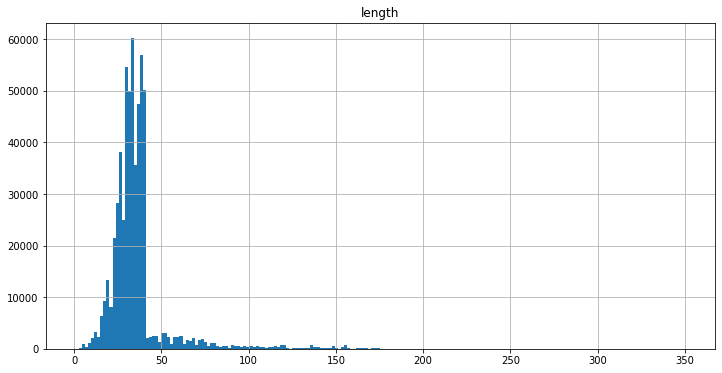

In [20]:
data_clean.hist(column='length', bins=200,figsize=(12,6));